### **(10) 자물쇠와 열쇠**

**문제**

비밀의 문을 발견, 자물쇠로 잠겨 있었고 문 앞에는 열쇠가 있다.  
자물쇠는 격자 한 칸의 크기가 1 X 1인 N X N 크기의 정사각 형태이고 열쇠는 M X M 크기인 정사각 격자 형태

* 자물쇠 영역내에서는 열쇠의 돌기 부분과 자물쇠의 홈 부분이 정확히 일치해야 한다.
* 열쇠의 돌기와 자물쇠의 돌기가 만나서는 안 된다. 
* 비어있는 곳이 없어야 자물쇠를 열 수 있다. 

**자물쇠를 열 수 있으면 true를, 열 수 없으면 false를 return 하는 solution 함수 완성하기**

**제한 사항**

* key는 M x M(3 ≤ M ≤ 20, M은 자연수)크기 2차원 배열
* lock은 N x N(3 ≤ N ≤ 20, N은 자연수)크기 2차원 배열
* M은 항상 N 이하
* key와 lock의 원소는 0 또는 1로 이루어져 있다.
* **0은 홈 부분, 1은 돌기 부분을 나타낸다.**

**입출력 예**

| **key**                           | **lock**                          | **result** |
|-----------------------------------|-----------------------------------|------------|
| [[0, 0, 0], [1, 0, 0], [0, 1, 1]] | [[1, 1, 1], [1, 1, 0], [1, 0, 1]] | true       |

### 접근 방식

* **완전 탐색**을 이용해서 열쇠를 이동이나 회전시켜서 자물쇠에 끼워보는 작업을 전부 시도해보는 접근 방법
* 완전 탐색을 수월하게 하기 위해서 자물쇠 리스트의 크기를 3배 이상으로 변경하면 계산이 수월해진다. 

### 코드 구현

    1) 열쇠와 자물쇠가 3 x 3 크기라고 가정
    2) 자물쇠의 크기가 3배인 새로운 리스트로 만들어 중앙 부분으로 옮긴다.
    3) 열쇠 배열을 왼쪽 부터 시작해서 한 칸씩 이동하는 방식으로 차례대로 자물쇠의 모든 홈을 채울 수 있는지 확인 
    4) 자물쇠 리스트에 열쇠 리스트의 값을 더한 뒤에, 더한 결과를 확인했을 때 자물쇠 부분의 모든 값이 정확히 1인지 확인 
   

### key point

**def rotate_a_matrix_by_90_degree()** 함수는 **'2차원 리스트를 90도 회전한결과를 반환하는 함수'** 인데 파이썬에서 2차원 리스트를 다룰 때 가끔씩 사용하므로 기억하기

In [3]:
# 2차원 리스트 90도 회전 
def rotate_a_matrix_by_90_degree(a):
    n = len(a) # 행 길이 계산
    m = len(a[0]) # 열 길이 계산
    
    result = [[0] * n for _ in range(m)] # 결과 리스트 
    for i in range(n) :
        for j in range(m) :
            result[j][n - i - 1] = a[i][j]
    
    return result 

# 자물쇠의 중간 부분이 모두 1인지 확인
def check(new_lock) :
    lock_length = len(new_lock) // 3
    for i in range(lock_length, lock_length * 2) :
        for j in range(lock_length, lock_length * 2):
            if new_lock[i][j] != 1:
                return False
            
    return True

def solution(key, lock) :
    n = len(lock)
    m = len(key)
    # 자물쇠의 크기를 기존의 3배로 변환 
    new_lock = [[0] * (n * 3) for _ in range(n * 3)] 
    # 새로운 자물쇠의 중앙 부분에 기존의 자물쇠 넣기
    for i in range(n) :
        for j in range(n) :
            new_lock[i + n][j + n] = lock[i][j]
            
            
    # 4가지 방향에 대해서 확인
    for rotation in range(4) :
        key = rotate_a_matrix_by_90_degree(key) # 열쇠 회전
        for x in range(n * 2) :
            for y in range(n * 2) :
                # 자물쇠에 열쇠를 끼워 넣기
                for i in range(m) :
                    for j in range(m) :
                        new_lock[x + i][y + j] += key[i][j]
                        
                # 새로운 자물쇠에 열쇠가 정확히 들어맞는지 검사
                if check(new_lock) == True :
                    return True
                
                # 자물쇠에서 열쇠를 다시 빼기
                for i in range(m) :
                    for j in range(m) :
                        new_lock[x + i][y + j] -= key[i][j]
                        
    return False


# 입출력 예시
solution([[0, 0, 0], [1, 0, 0], [0, 1, 1]], [[1, 1, 1], [1, 1, 0], [1, 0, 1]])

True

In [4]:
# 2차원 리스트 90도 회전 
def rotate_a_matrix_by_90_degree(a):
    n = len(a) # 행 길이 계산
    m = len(a[0]) # 열 길이 계산
    
    result = [[0] * n for _ in range(m)] # 결과 리스트 
    for i in range(n) :
        for j in range(m) :
            result[j][n - i - 1] = a[i][j]
    
    return result 

rotate_a_matrix_by_90_degree([[0, 0, 0], [1, 0, 0], [0, 1, 1]])

[[0, 1, 0], [1, 0, 0], [1, 0, 0]]

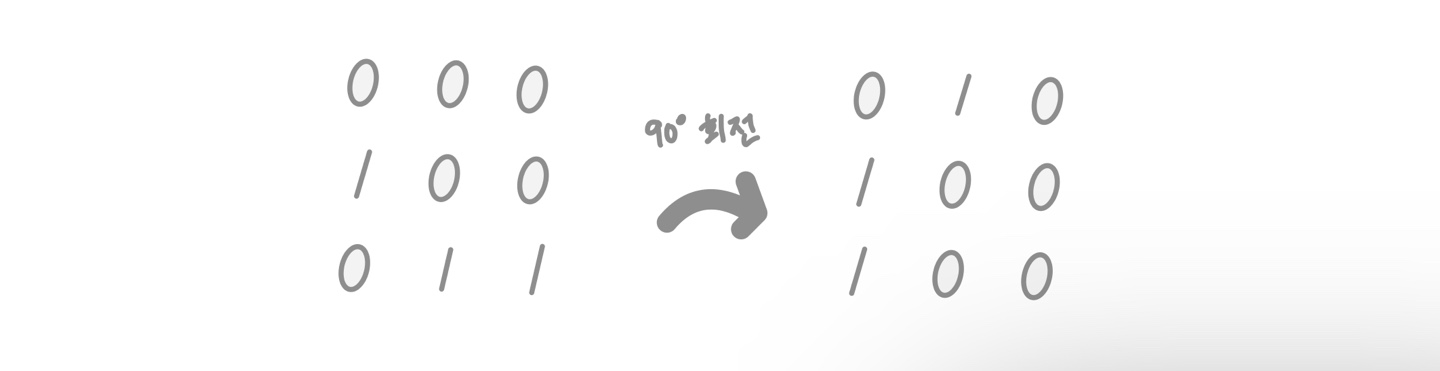

In [7]:
bb = [[0, 0, 0], [1, 0, 0], [0, 1, 1]]
len(bb) # 3
len(bb[0]) # 3

3

In [10]:
# 자물쇠의 중간 부분이 모두 1인지 확인
def check(new_lock) :
    lock_length = len(new_lock) // 3
    for i in range(lock_length, lock_length * 2) :
        for j in range(lock_length, lock_length * 2):
            if new_lock[i][j] != 1:
                return False
            
    return True

check([[1, 1, 1], [1, 1, 0], [1, 0, 1]])
# 이해가 안 감 ㅠ

True

In [25]:
def solution(key, lock) :
    n = len(lock)
    m = len(key)
    # 자물쇠의 크기를 기존의 3배로 변환 
    new_lock = [[0] * (n * 3) for _ in range(n * 3)] 
    # 새로운 자물쇠의 중앙 부분에 기존의 자물쇠 넣기
    for i in range(n) :
        for j in range(n) :
            new_lock[i + n][j + n] = lock[i][j]
            print(new_lock)
            
    # 4가지 방향에 대해서 확인
    for rotation in range(4) :
        key = rotate_a_matrix_by_90_degree(key) # 열쇠 회전
        for x in range(n * 2) :
            for y in range(n * 2) :
                # 자물쇠에 열쇠를 끼워 넣기
                for i in range(m) :
                    for j in range(m) :
                        new_lock[x + i][y + j] += key[i][j]
                        
                        
                # 새로운 자물쇠에 열쇠가 정확히 들어맞는지 검사
                if check(new_lock) == True :
                    return True
                
                # 자물쇠에서 열쇠를 다시 빼기
                for i in range(m) :
                    for j in range(m) :
                        new_lock[x + i][y + j] -= key[i][j]
                        
    return False

solution([[0, 0, 0], [1, 0, 0], [0, 1, 1]], [[1, 1, 1], [1, 1, 0], [1, 0, 1]])


#    [[0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0], 
#     [0, 0, 0, 0, 0, 0, 0, 0, 0], 
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0]]

#    [[0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0]]

#    [[0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 1, 1, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0]]

#    [[0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 1, 1, 0, 0, 0],
#     [0, 0, 0, 1, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0]]

#    [[0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 1, 1, 0, 0, 0],
#     [0, 0, 0, 1, 1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0]]

#    [[0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 1, 1, 0, 0, 0],
#     [0, 0, 0, 1, 1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0]]

#    [[0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 1, 1, 0, 0, 0],
#     [0, 0, 0, 1, 1, 0, 0, 0, 0],
#     [0, 0, 0, 1, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0]]

#    [[0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 1, 1, 0, 0, 0],
#     [0, 0, 0, 1, 1, 0, 0, 0, 0],
#     [0, 0, 0, 1, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0]]

#    [[0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 1, 1, 0, 0, 0],
#     [0, 0, 0, 1, 1, 0, 0, 0, 0],
#     [0, 0, 0, 1, 0, 1, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0, 0]]

[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 

True